In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')

In [3]:
X=data[ ['MPG.city', 'MPG.highway', 'EngineSize',    'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']]
Y=data['Price'].values.reshape(-1,1)

In [4]:
def model(x, coefs):
    y = np.zeros(len(x))
    p = len(coefs)
    for i in range(p):
        y += coefs[i] * x**(p-i-1)
    return y

def mse(y_a, y_b):
    d = (y_a - y_b)**2
    return d.mean()

In [5]:
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model

In [6]:
def loo(X,Y,a):
    
    loo=LeaveOneOut()
    MSE=[]
    it=1000
    alphas=np.linspace(5E-3,5,it)
    betas=np.zeros((X.shape[1]+1))
    #for i in range(it):
     #   clf = linear_model.Lasso(alpha=0.1)
     #   clf.fit(X,Y)
     #   betas[i,0]=clf.intercept_
     #   betas[i,1:]=clf.coef_
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        clf = linear_model.Lasso(alpha=a,normalize=True)
        clf.fit(X_train,y_train)
        y_err=clf.predict(X_test)
        MSE.append(mse(y_test,y_err))
        betas[0]=clf.intercept_
        betas[1:]=clf.coef_
    return np.mean(MSE),betas
        #betas[i,0]=clf.intercept_
        #betas[i,1:]=clf.coef_

In [7]:
it=1000
alphas=np.linspace(5E-3,5,it)
betas=np.zeros((it,X.shape[1]+1))
errors=np.zeros(it)
for i in range(it):
    lool=loo(np.array(X),Y,alphas[i])
    errors[i]=lool[0]
    betas[i]=lool[1]

Text(0, 0.5, 'Normalized errors')

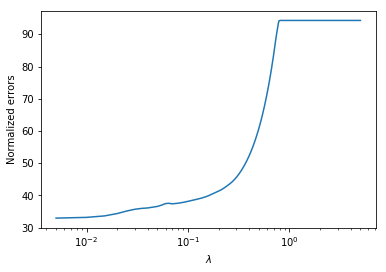

In [8]:
plt.plot(alphas,errors)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Normalized errors')

In [9]:
betas.shape
betas[2,:]

array([ 2.96378012e+01, -0.00000000e+00, -2.03326439e-01,  7.63935690e-01,
        1.42412390e-01, -1.34225342e-03,  1.50468313e-03,  6.06810604e-02,
       -8.67756342e-01,  7.55861354e-02,  5.28455157e-01, -1.06434025e+00,
       -3.78179920e-01,  1.06551652e-06])

ValueError: x and y must have same first dimension, but have shapes (1000,) and (14,)

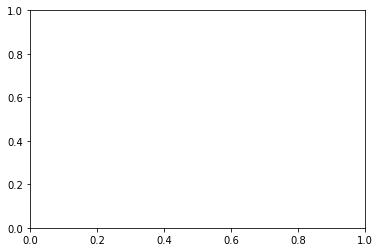

In [10]:
for i in range(betas.shape[1]):
    st='$\beta$'+str(i)
    plt.plot(alphas,betas[i,:],label=st)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coeficientes normalizados')
plt.legend(loc='best')